In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from computer_ontology.config import *
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from computer_ontology.custom_funcs import *

/home/akshay/miniconda3/envs/ontology/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
dataset = pd.read_csv(alldesc_train_path_2025)
dataset = dataset[['CID', 'IsomericSMILES', 'Descriptors']]

/tmp/ipykernel_14249/417031568.py:7: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  u = (pd.get_dummies(pd.DataFrame(lst), prefix='', prefix_sep='')
/home/akshay/miniconda3/envs/ontology/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Lib

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

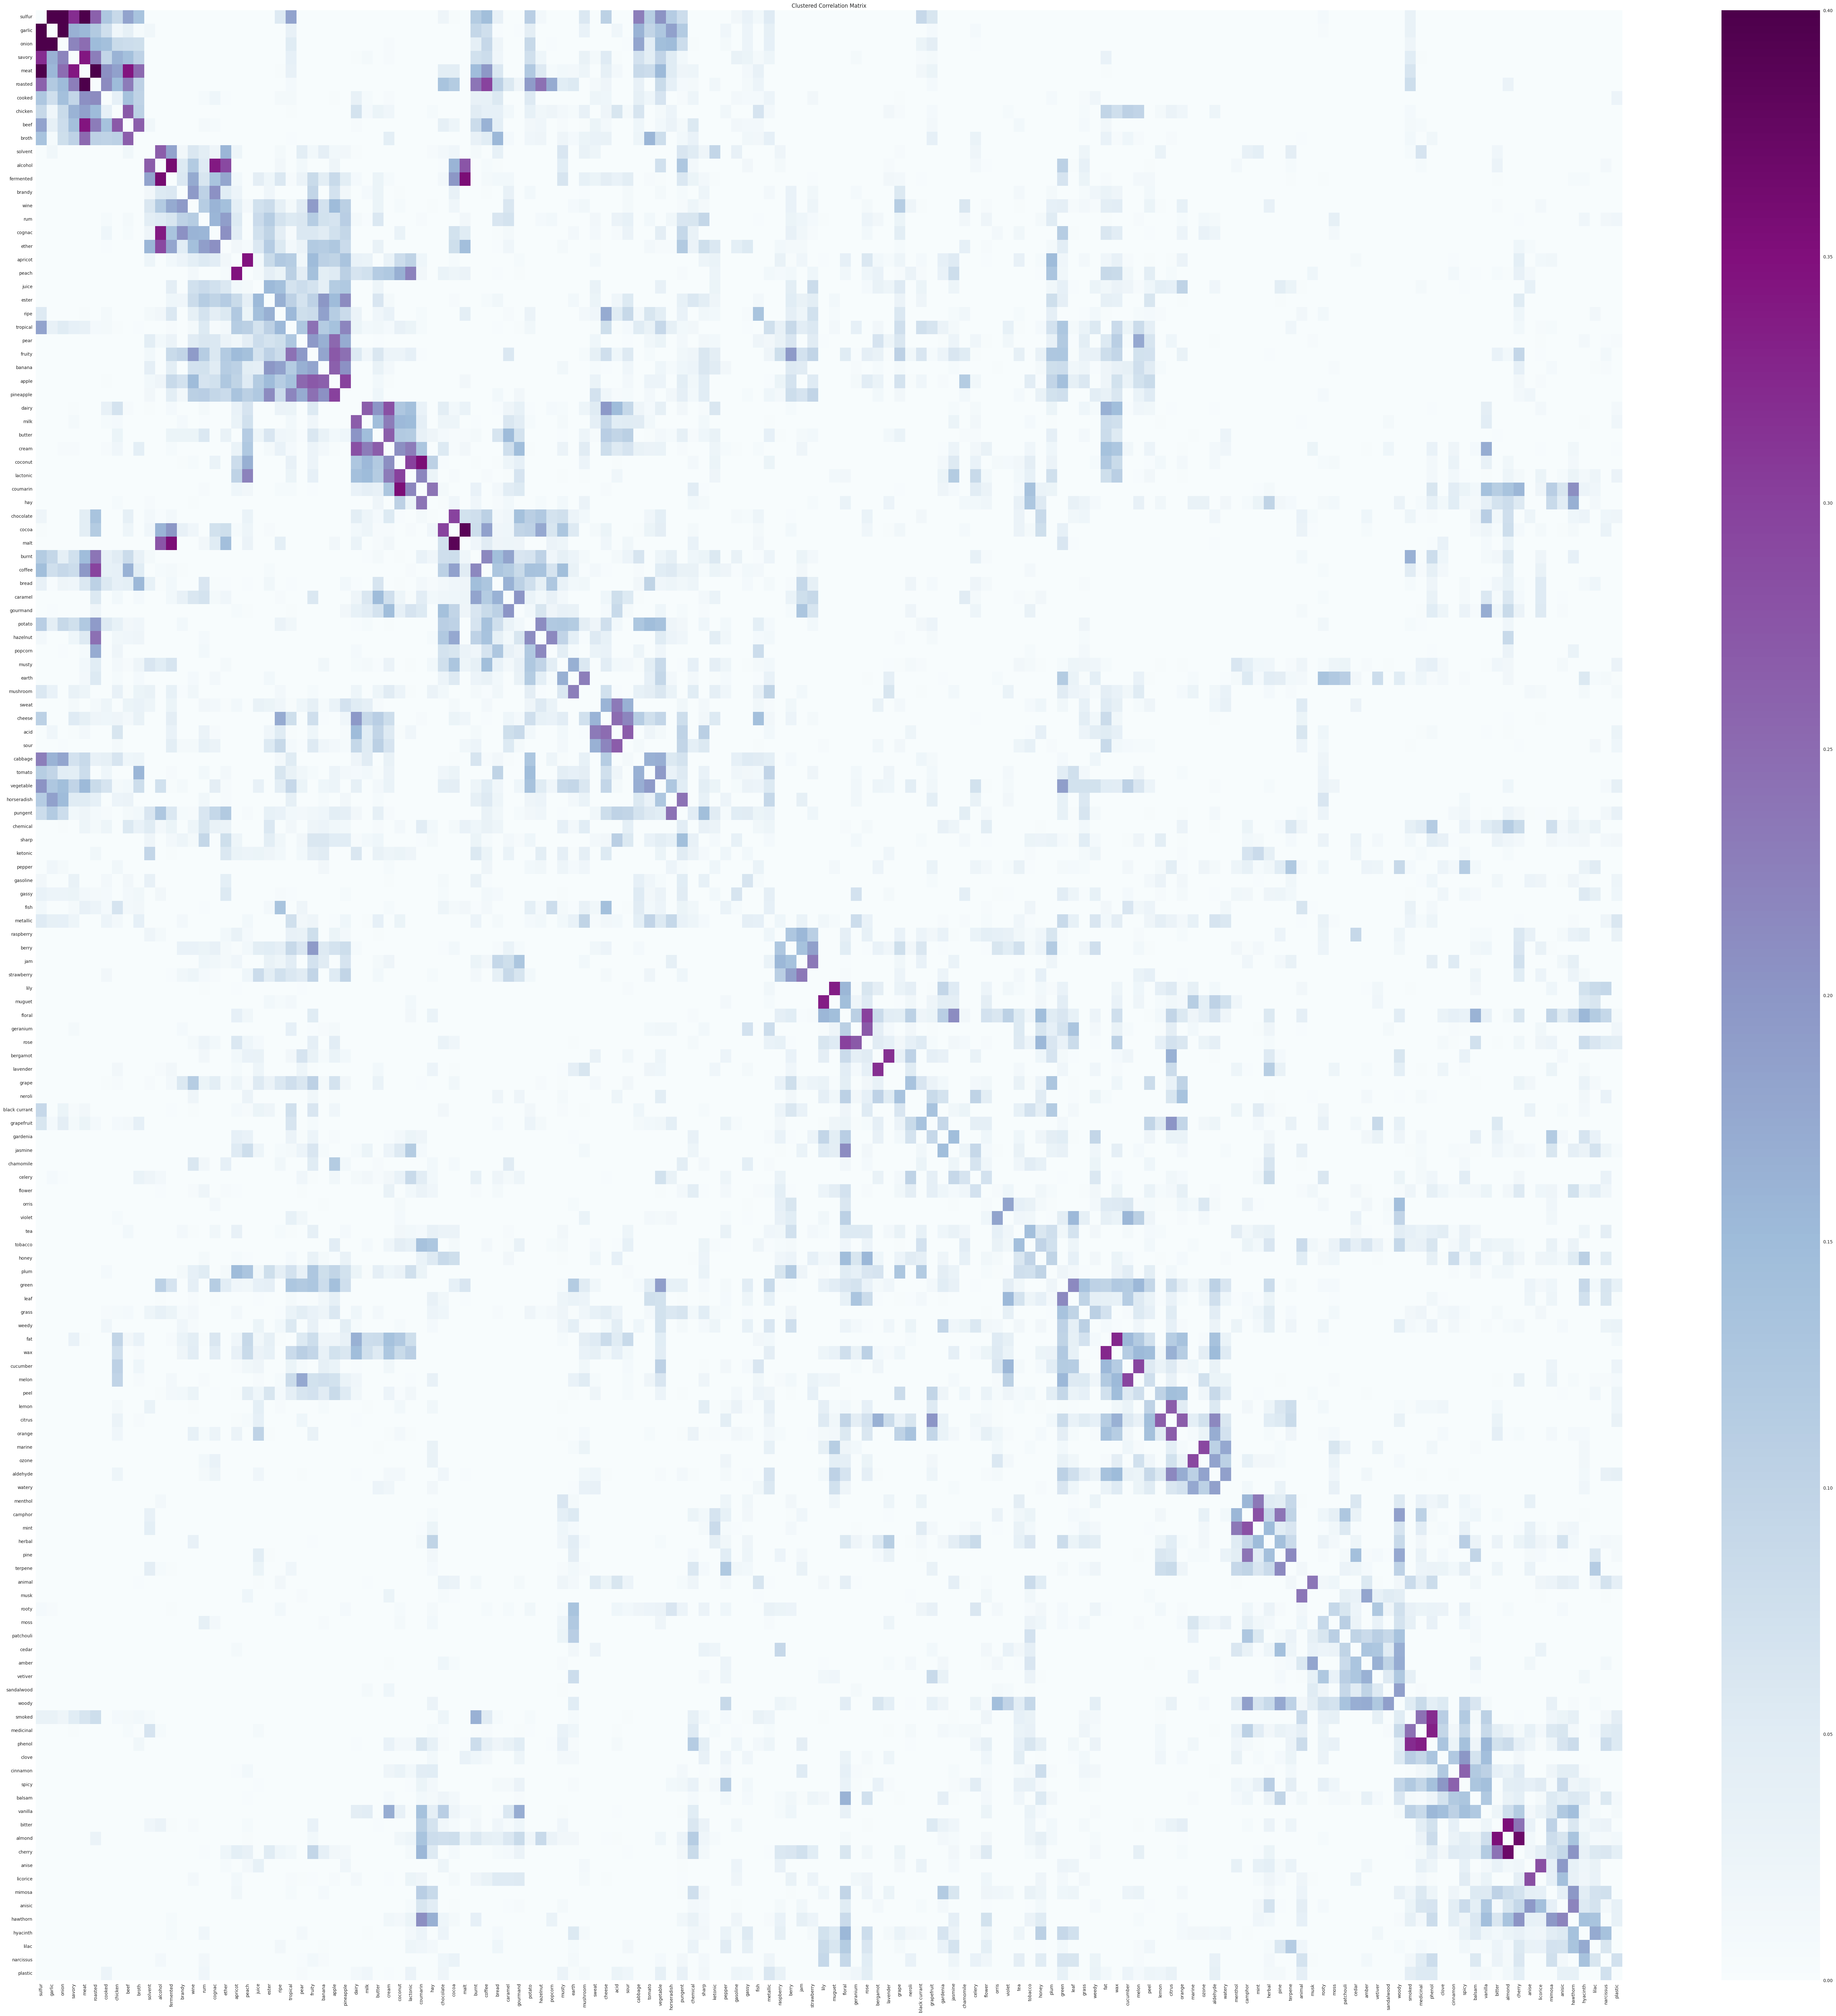

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

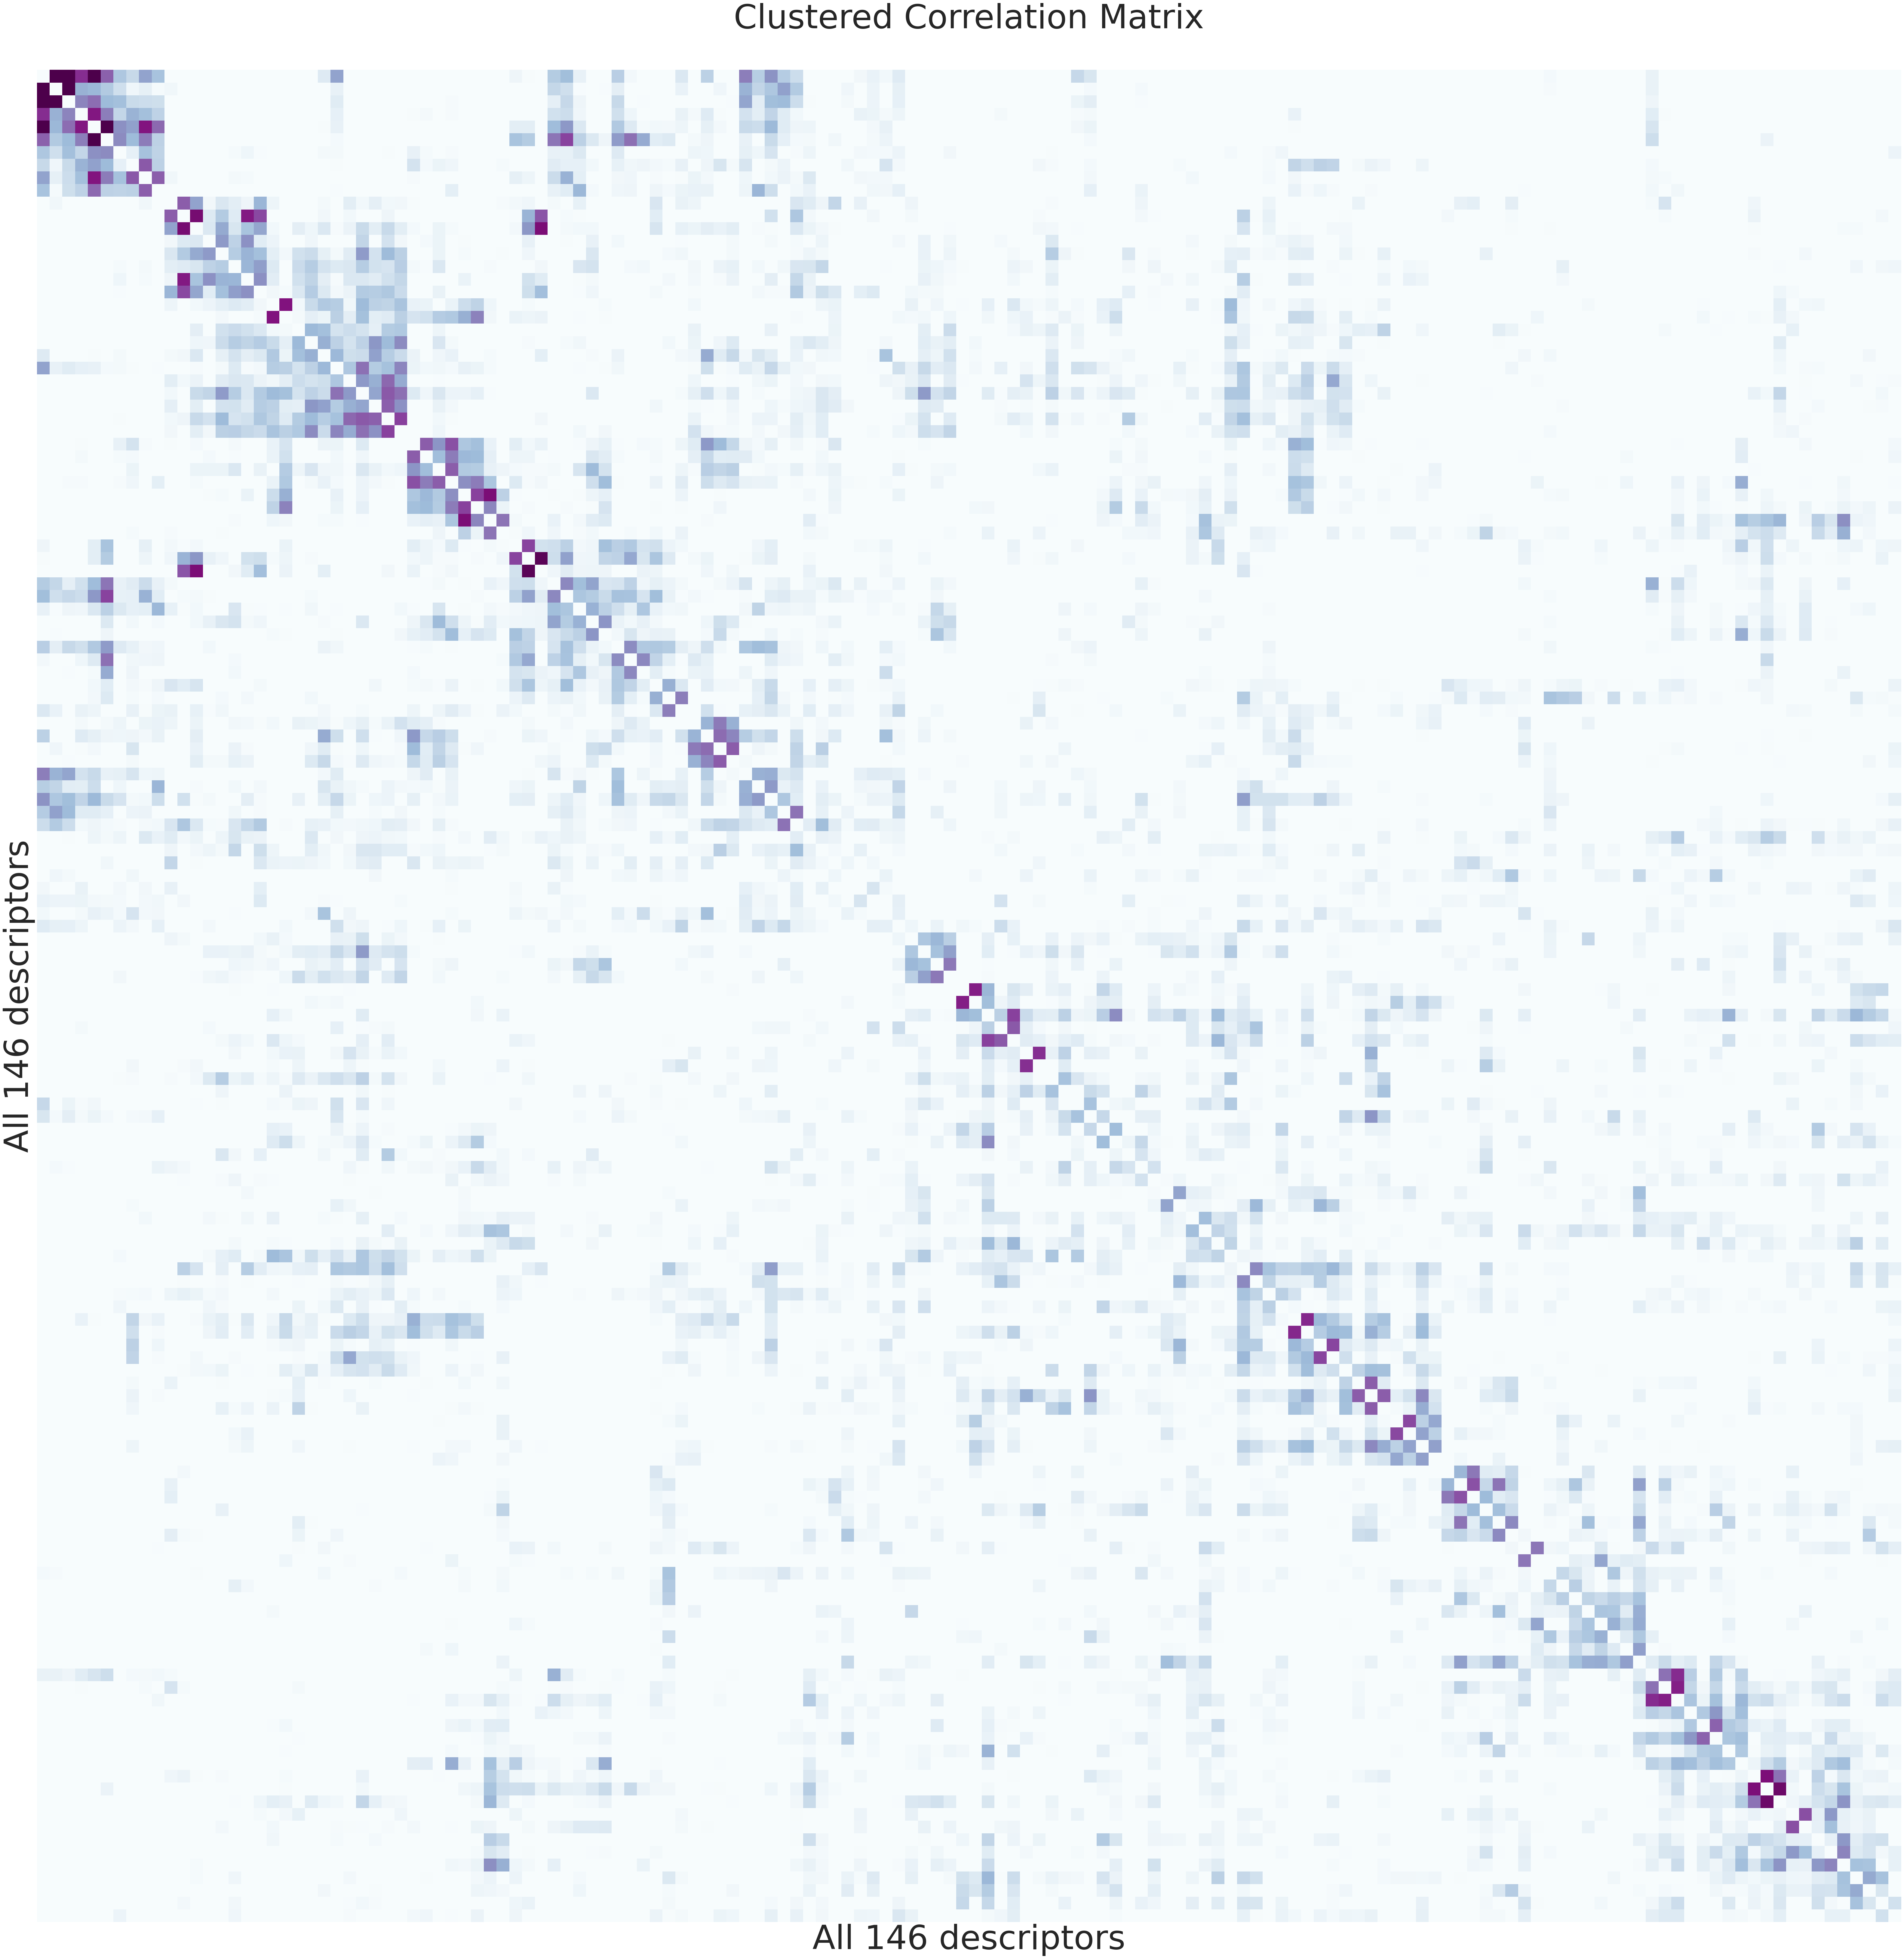

In [ ]:
cluster_dataset = dataset.copy()

label_data = cluster_dataset.drop(["CID", "IsomericSMILES"], axis=1)

# Split the labels by semicolon and store them as a list
lst = label_data['Descriptors'].str.split(';').tolist()
u = (pd.get_dummies(pd.DataFrame(lst), prefix='', prefix_sep='')
       .groupby(level=0, axis=1)
       .sum())
u = u.iloc[1: , :]
u = u.iloc[: , 1:]

correlation_matrix = u.corr()

# Calculate the hierarchical clustering and obtain the linkage matrix
linkage = sns.clustermap(correlation_matrix, method='ward', cmap="BuPu", figsize=(80, 80), annot=False, vmax=0.4,
    vmin=0)


# Extract the new order of columns based on the clustering
new_order = linkage.dendrogram_row.reordered_ind

# Reorder the correlation matrix and create a reordered heatmap
reordered_correlation_matrix = correlation_matrix.iloc[new_order, new_order]
np.fill_diagonal(reordered_correlation_matrix.values, 0)
plt.figure(figsize=(80, 80))
sns.heatmap(reordered_correlation_matrix, cmap="BuPu", annot=False, vmax=0.4,
    vmin=0)

plt.title("Clustered Correlation Matrix")
plt.show()

# Plot 2: Heatmap WITHOUT axes labels, ticks, or title
plt.figure(figsize=(80, 80))
ax = sns.heatmap(reordered_correlation_matrix, cmap="BuPu", annot=False, vmax=0.4, vmin=0)

# Remove axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel("All 146 descriptors", fontsize=80)
ax.set_ylabel("All 146 descriptors", fontsize=80)
ax.set_title("")

# Add a large title
plt.title("Clustered Correlation Matrix", fontsize=80, pad=100)

# Remove colorbar if desired
ax.collections[0].colorbar.remove()

plt.show()

In [ ]:
# Define your start and end descriptor names
start_label = "solvent"
end_label = "pineapple"

# Get the list of reordered labels
labels = reordered_correlation_matrix.columns.tolist()

# Get index positions of the start and end descriptors
start_idx = labels.index(start_label)
end_idx = labels.index(end_label)

# Ensure proper ordering
if start_idx > end_idx:
    start_idx, end_idx = end_idx, start_idx

# Slice using .iloc
selected_block = reordered_correlation_matrix.iloc[start_idx:end_idx+1, start_idx:end_idx+1]


plt.figure(figsize=(40, 40))
ax = sns.heatmap(
    selected_block,
    cmap="BuPu",
    annot=False,
    vmax=0.25,
    vmin=0,
    square=True,
    xticklabels=True,  # Ensure x-axis labels are displayed
    yticklabels=True,   # Ensure y-axis labels are displayed
    cbar_kws={'shrink': 0.8}
)

# Adjust y-axis labels (bottom-aligned words with dashes meeting the words)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right', va='center', fontsize=27)

# Adjust x-axis labels (inclined words properly aligned)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', va='center', fontsize=27)

ax.tick_params(axis='both', which='both', length=20)

# Adjust tick parameters for proper alignment
ax.tick_params(axis='y', pad=10)  # Adds padding between labels and axis for y-axis
ax.tick_params(axis='x', pad=40)  # Adds padding between labels and axis for x-axis

# Get the colorbar and set its label and tick size
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=27)  # <-- Increase colorbar tick label font size here

# Ensure labels and titles fit well into the plot
plt.title("Clustered Correlation Matrix", fontsize=30, pad=20)  # Add padding to the title
plt.tight_layout()  # Automatically adjusts subplot parameters to fit labels
plt.savefig('adjusted_labels.png', format='png', dpi=800, bbox_inches="tight", )
plt.show()


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

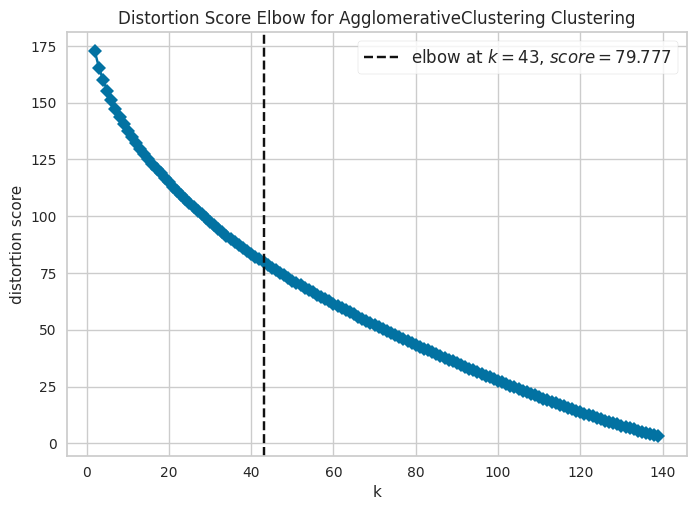

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
correlation_matrix = u.corr()

# ElbowVisualizer
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,140), timings=False)
visualizer.fit(correlation_matrix)
visualizer.show()

In [ ]:
correlation_matrix = u.corr()

# agglomerative algorithm -- change the n_clusters to what is suitable
model = AgglomerativeClustering(n_clusters = 16, metric = 'euclidean', linkage ='ward')
# training the model on dataset
y_model = model.fit_predict(correlation_matrix)
# creating pandas dataframe
correlation_matrix['cluster'] = pd.Series(y_model)

umbrella = {}
for i in range(len(y_model)):
    if y_model[i] not in umbrella:
        umbrella[y_model[i]] = []
    umbrella[y_model[i]].append(correlation_matrix.columns[i])

# umbrella = change_key(umbrella, 0, 'sulfur')

check = rows = [(word, key) for key, words in umbrella.items() for word in words]
mapping = pd.DataFrame(rows, columns=["Original Descriptors", "Umbrella Terms"])

mapping

,Original Descriptors,Umbrella Terms
0,acid,12
1,cheese,12
2,sour,12
3,sweat,12
4,alcohol,7
...,...,...
141,wax,6
142,weedy,6
143,garlic,13
144,onion,13


In [ ]:
mapping.to_excel("computer_ontology_2025.xlsx")